<a href="https://colab.research.google.com/github/victoriadarosa/assignment2/blob/main/assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [1]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 8.11 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
def pn(x):
    print(x,'\n')
    return

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [3]:
#1 load the data and look at the head and dimensions
import pandas as pd
df = pd.read_csv('./assignment3/data/car_data.csv')
print(df.columns)
df.head()

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
#2.1 Summarize the variables
df.describe()

df['User ID'].value_counts()
df['Gender'].value_counts()
df['Age'].value_counts()
df['AnnualSalary'].value_counts()
df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

User ID is a unique value given to every person to represent each customer. Gender is the gender of every customer and only has two values. Age is the age of the customer. AnnualSalary is how much each customer makes. Purchase represents if the customer actually bought a car or not and only has two values. The data does not have missing values.

In [5]:
#2.2 Convert the categorical column Gender and make a dummy variable
df['gender_count'] = 0
df.loc[ df['Gender']== 'Female', 'gender_count'] = 1
df['gender_count'].value_counts()

1    516
0    484
Name: gender_count, dtype: int64

In [6]:
#2.3 Matrix  𝑋  of predictors including Age, Annual Salary, and Purchased
vars = ['Age','AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']

In [7]:
#3 MaxMin-normalize Age and AnnualSalary in X
def maxmin(x): # Maxmin normalization function
    x = (x-min(x))/(max(x)-min(x))
    return x

X = X.apply(maxmin) # Apply maxmin normalization function to all columns of X

X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [8]:
#4 ~80% training dataset and a ~20% testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

[ 6 16]


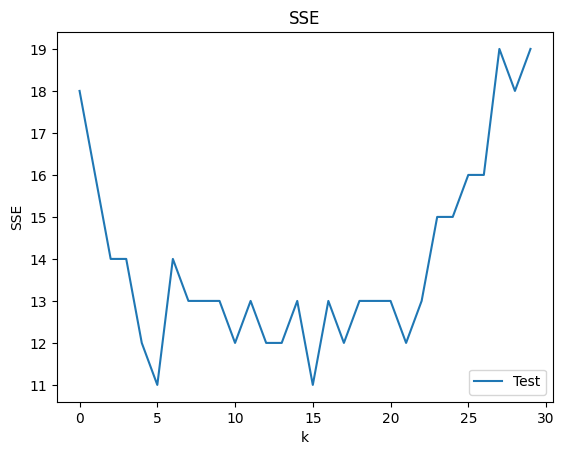

In [9]:
#5 Predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Import the kNN classifier tool

# Determine the optimal k:
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

plt.title('SSE')
plt.show()

In [10]:
#6 Confusion matrix
model = KNeighborsClassifier(n_neighbors=5) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,118,7
1,5,70


6) The vast majority of cases are predicted correctly: 0's go to 0's and 1's go to 1's. There's 7 times where 0 is classified as a 1 and 5 times where 1 is classified as a zero, but this is 12/200=.06 proportion of cases. The overall accuracy is 188/200=.94 proportion of cases.

In [11]:
#7 Men and women confusion matrices
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

# Use the selected k to train the model, not using the gender variable:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for test

# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

In [12]:
#Woman matrix
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,56,6
1,12,35


In [13]:
#Man matrix
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,58,5
1,10,18


For men, about 76/91 = .8352 are correct, while for women, about 91/109 =
.8349. It seems like the model does a slighty better job predicting what a male
customer will do, rather than a female customer. The difference is about
.036%, or the male model is .036% more accurate. Overall, the model has a very similar accuracy for both groups. However, we can continue to ask, "How
can we improve accuracy for the group that seems to be getting worse
treatment?" in order to improve fairness.


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [14]:
#1.1 load in the data and remove necessary columns
import pandas as pd
ds = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')
print(ds.columns)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
ds = ds.drop(columns=['Unnamed: 0', 'brand', 'model', 'title_status', 'color', 'vin', 'lot', 'state', 'country', 'condition'])
print(ds.columns)

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')
Index(['price', 'year', 'mileage'], dtype='object')


In [15]:
#1.2 look at head of data and check for NAs
ds.head()
ds['price'].value_counts()
ds['year'].value_counts()
ds['mileage'].value_counts()

1        11
0         6
31727     2
33808     2
21774     2
         ..
90685     1
54141     1
82240     1
66167     1
31371     1
Name: mileage, Length: 2439, dtype: int64

There are no NA values to handle.

In [16]:
#2 maxmin normalize year and mileage
vars = ['year','mileage']
X = ds.loc[:,vars]
y = ds.loc[:,'price']

def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

X = X.apply(maxmin)
X.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [17]:
#3 split the sample into ~80% for training and ~20% for evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

72032294950.55556


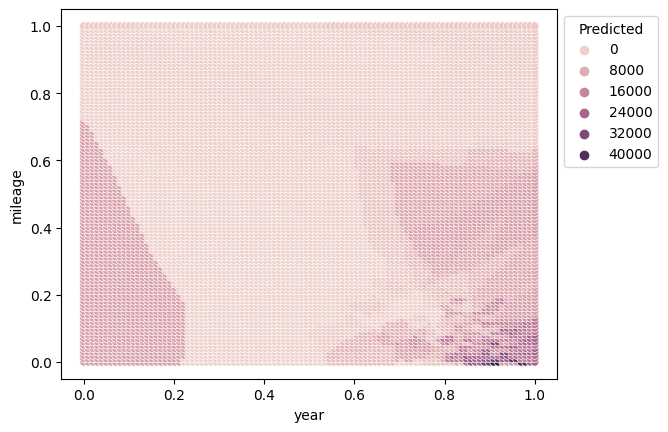

In [18]:
#4.1 predict price using year and mileage for the test set for 𝑘=3
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
import seaborn as sns
import numpy as np

k=3
model_3 = kNNRegression(n_neighbors=k) # Create a sk model for k=3
fitted_model_3 = model_3.fit(X_train, y_train)

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(X_train['year'].min(), X_train['year'].max(), N_x) # Create a grid of x values
grid_y = np.linspace(X_train['mileage'].min(), X_train['mileage'].max(), N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x, grid_y) # Create a meshgrid of all possible pairs
X = xs.reshape(N_x * N_y) # Turns pairs into vectors
Y = ys.reshape(N_x * N_y) # Turns pairs into vectors

x_hat = pd.DataFrame({'year': X, 'mileage': Y}) # Create a dataframe of points to plot
y_hat = fitted_model_3.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

#used this to calculate sse: https://www.statology.org/sst-ssr-sse-in-python/
sse = np.sum((y_test - fitted_model_3.predict(X_test)) ** 2)
print(sse)

this_plot = sns.scatterplot(data=x_hat, x='year', y='mileage', hue='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

58525872121.93001


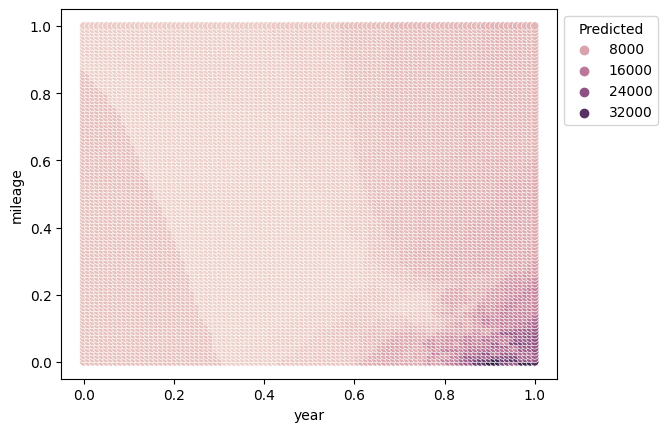

In [19]:
#4.2 predict price using year and mileage for the test set for 𝑘=10
k=10
model_10 = kNNRegression(n_neighbors=k) # Create a sk model for k=10
fitted_model_10 = model_10.fit(X_train, y_train)

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(X_train['year'].min(), X_train['year'].max(), N_x) # Create a grid of x values
grid_y = np.linspace(X_train['mileage'].min(), X_train['mileage'].max(), N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x, grid_y) # Create a meshgrid of all possible pairs
X = xs.reshape(N_x * N_y) # Turns pairs into vectors
Y = ys.reshape(N_x * N_y) # Turns pairs into vectors

x_hat = pd.DataFrame({'year': X, 'mileage': Y}) # Create a dataframe of points to plot
y_hat = fitted_model_10.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

sse = np.sum((y_test - fitted_model_10.predict(X_test)) ** 2)
print(sse)

this_plot = sns.scatterplot(data=x_hat, x='year', y='mileage', hue='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

54338576525.1024


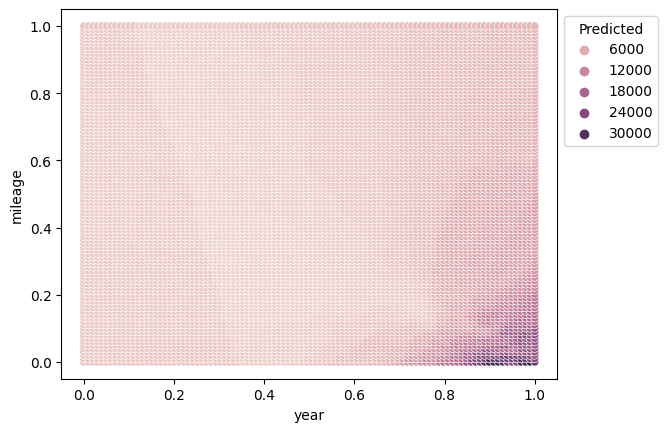

In [20]:
#4.3 predict price using year and mileage for the test set for 𝑘=25
k=25
model_25 = kNNRegression(n_neighbors=k) # Create a sk model for k=25
fitted_model_25 = model_25.fit(X_train, y_train)

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(X_train['year'].min(), X_train['year'].max(), N_x) # Create a grid of x values
grid_y = np.linspace(X_train['mileage'].min(), X_train['mileage'].max(), N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x, grid_y) # Create a meshgrid of all possible pairs
X = xs.reshape(N_x * N_y) # Turns pairs into vectors
Y = ys.reshape(N_x * N_y) # Turns pairs into vectors

x_hat = pd.DataFrame({'year': X, 'mileage': Y}) # Create a dataframe of points to plot
y_hat = fitted_model_25.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

sse = np.sum((y_test - fitted_model_25.predict(X_test)) ** 2)
print(sse)

this_plot = sns.scatterplot(data=x_hat, x='year', y='mileage', hue='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

53719560383.1944


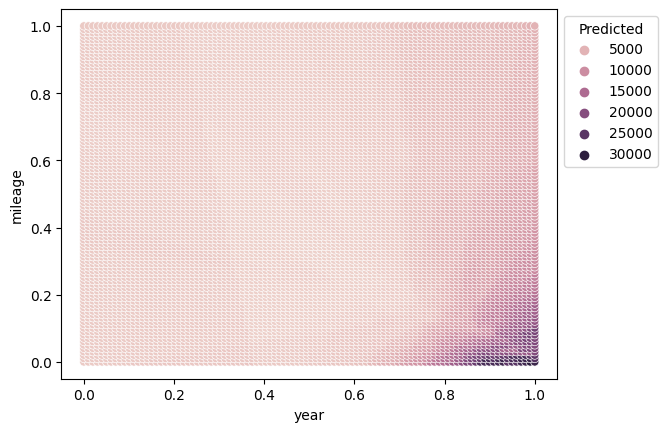

In [21]:
#4.4 predict price using year and mileage for the test set for 𝑘=50
k=50
model_50 = kNNRegression(n_neighbors=k) # Create a sk model for k=50
fitted_model_50 = model_50.fit(X_train, y_train)

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(X_train['year'].min(), X_train['year'].max(), N_x) # Create a grid of x values
grid_y = np.linspace(X_train['mileage'].min(), X_train['mileage'].max(), N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x, grid_y) # Create a meshgrid of all possible pairs
X = xs.reshape(N_x * N_y) # Turns pairs into vectors
Y = ys.reshape(N_x * N_y) # Turns pairs into vectors

x_hat = pd.DataFrame({'year': X, 'mileage': Y}) # Create a dataframe of points to plot
y_hat = fitted_model_50.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

sse = np.sum((y_test - fitted_model_50.predict(X_test)) ** 2)
print(sse)

this_plot = sns.scatterplot(data=x_hat, x='year', y='mileage', hue='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

53526269447.2881


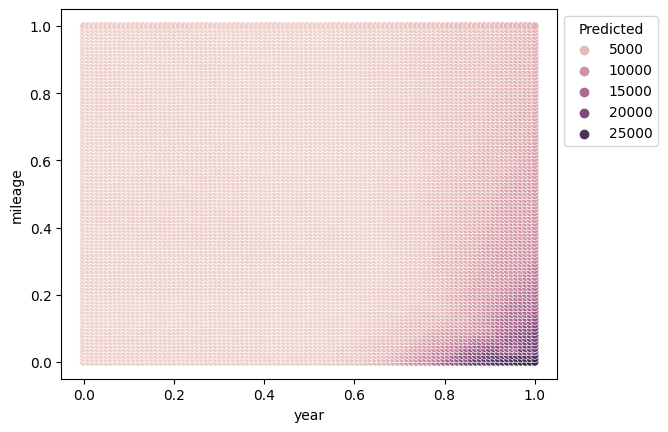

In [22]:
#4.5 predict price using year and mileage for the test set for 𝑘=100
k=100
model_100 = kNNRegression(n_neighbors=k) # Create a sk model for k=100
fitted_model_100 = model_100.fit(X_train, y_train)

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(X_train['year'].min(), X_train['year'].max(), N_x) # Create a grid of x values
grid_y = np.linspace(X_train['mileage'].min(), X_train['mileage'].max(), N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x, grid_y) # Create a meshgrid of all possible pairs
X = xs.reshape(N_x * N_y) # Turns pairs into vectors
Y = ys.reshape(N_x * N_y) # Turns pairs into vectors

x_hat = pd.DataFrame({'year': X, 'mileage': Y}) # Create a dataframe of points to plot
y_hat = fitted_model_100.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

sse = np.sum((y_test - fitted_model_100.predict(X_test)) ** 2)
print(sse)

this_plot = sns.scatterplot(data=x_hat, x='year', y='mileage', hue='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

54924218768.55986


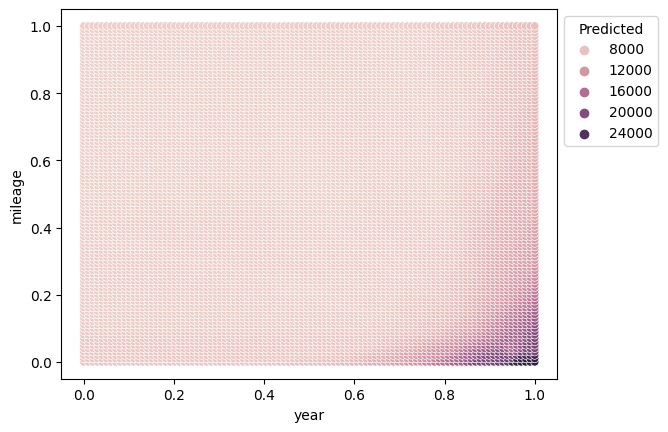

In [23]:
#4.6 predict price using year and mileage for the test set for 𝑘=300
k=300
model_300 = kNNRegression(n_neighbors=k) # Create a sk model for k=300
fitted_model_300 = model_300.fit(X_train, y_train)

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(X_train['year'].min(), X_train['year'].max(), N_x) # Create a grid of x values
grid_y = np.linspace(X_train['mileage'].min(), X_train['mileage'].max(), N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x, grid_y) # Create a meshgrid of all possible pairs
X = xs.reshape(N_x * N_y) # Turns pairs into vectors
Y = ys.reshape(N_x * N_y) # Turns pairs into vectors

x_hat = pd.DataFrame({'year': X, 'mileage': Y}) # Create a dataframe of points to plot
y_hat = fitted_model_300.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

sse = np.sum((y_test - fitted_model_300.predict(X_test)) ** 2)
print(sse)

this_plot = sns.scatterplot(data=x_hat, x='year', y='mileage', hue='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

4) As k increases, we notice a broader range of predicted prices for cars. The larger number of neighbors results in a larger set of price estimates. However, we also see the boundaries of the decisions become softer and the predictions become less binary as k increases. We see a lot more cars be values at 8000 - 12000 dollars as k increases. We also see the prices settle into groups around the graphs as k increases. For example, as k increases, we don't see different predicted prices for similar years and mileage.

In [24]:
#5 find the optimal k
#used chatgpt to modify the code given during lecture, i.e. test for a specific values of k (k_values)
k_values = [3, 10, 25, 50, 100, 300]

SSE_train = np.zeros(len(k_values))
SSE_test = np.zeros(len(k_values))

for i, k in enumerate(k_values):
    model = kNNRegression(n_neighbors=k) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[i] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[i] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_train) # Lowest recorded SSE
min_index = np.where(SSE_train==SSE_min) # Find the indices of y that equal the minimum
k_star = k_values[min_index[0][0]] # Find the optimal value of k
pn(k_star)

3 



6. In small values of k, like k = 3, the plots are overfitting and complex. It closely fits the training data, but fails to generalize new and unseen data making it unreliable to explain the data. In larger values of k, like k = 300, the plots are underfitting and simple. These plot generalize too much and the predication become very smooth making it unreliable to explain the data. The middle values of k are able to create plots that can properly fit the training data and generalize the test data to make more reliable predictions.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [25]:
#run this code
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
  np.random.seed(100) # Set the seed for replicability
  # Generate (x1,x2,g) triples:
  X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
  X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
  X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
  # Concatenate into one data frame
  gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
  gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
  gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
  df = pd.concat([gdf1,gdf2,gdf3],axis=0)
  return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

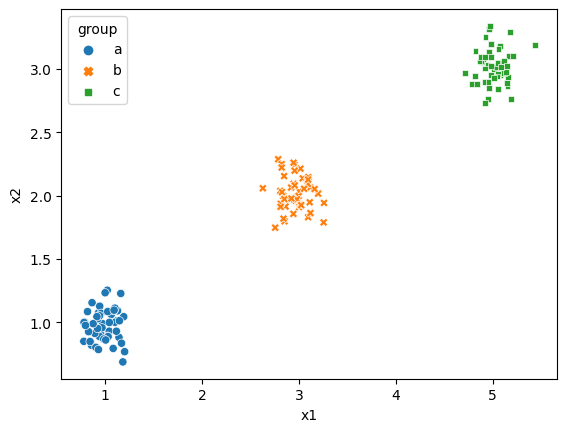

In [26]:
#2.1 Make scatterplots
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

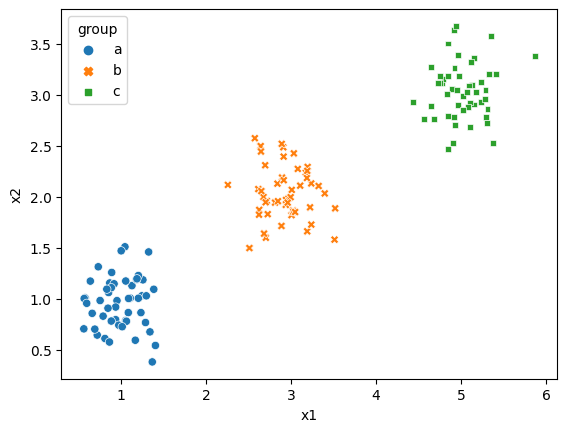

In [27]:
#2.2 Make scatterplots
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

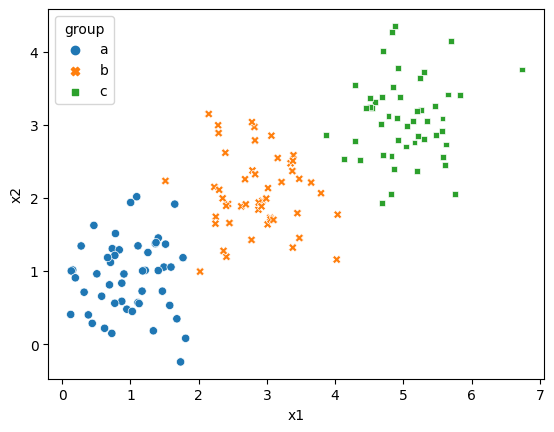

In [28]:
#2.3 Make scatterplots
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

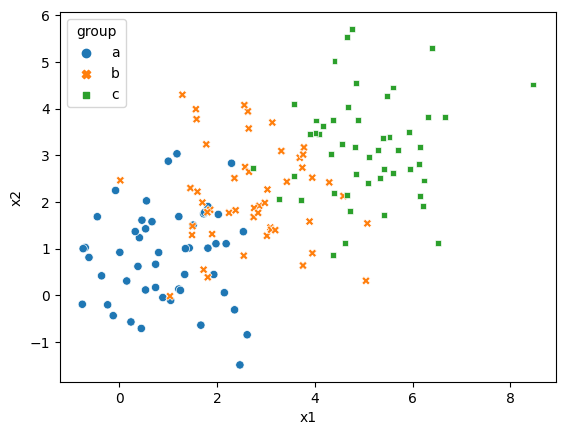

In [29]:
#2.4 Make scatterplots
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

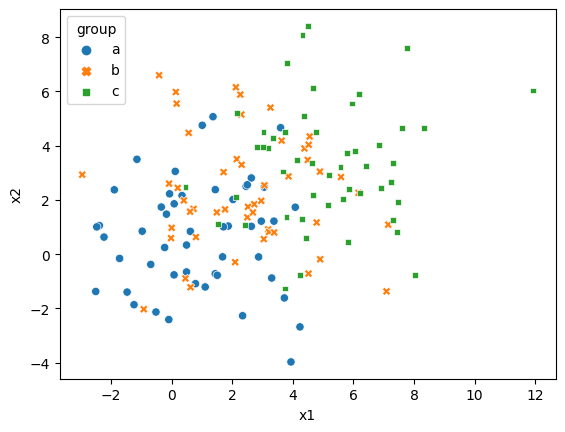

In [30]:
#2.5 Make scatterplots
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

In [31]:
#3.1 Scree plots
def maxmin(x): # Max-min scaler function
  x = (x-min(x))/(max(x)-min(x))
  return x

def scree(data): # I built a function to make scree plots quickly
  # Preprocess the data:
  X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
  X = X.apply(maxmin) # Normalize the data
  # Create a scree plot:
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) #
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
  axes.set_ylim(0, 35)

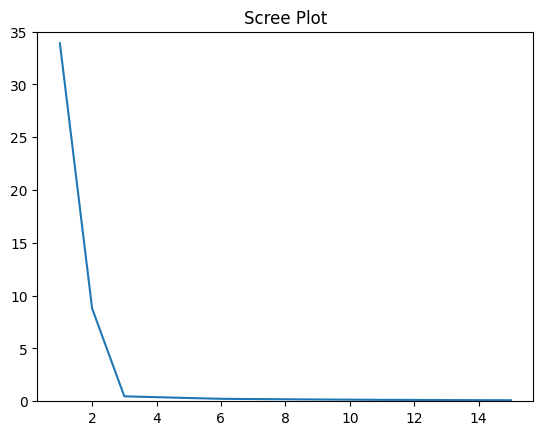

In [32]:
#3.2 Print scree plot - elbow at 3
scree( data = df0_125 )

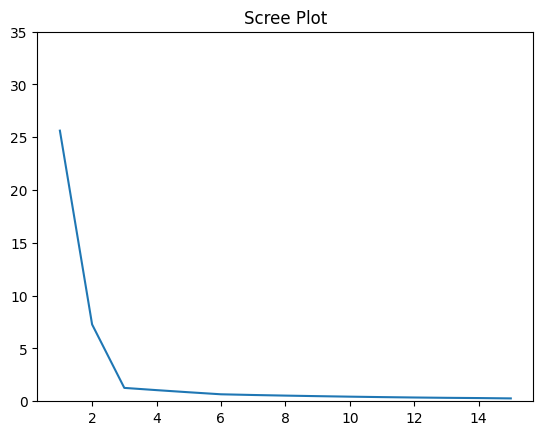

In [33]:
#3.3 Print scree plot - elbow at 3
scree( data = df0_25 )

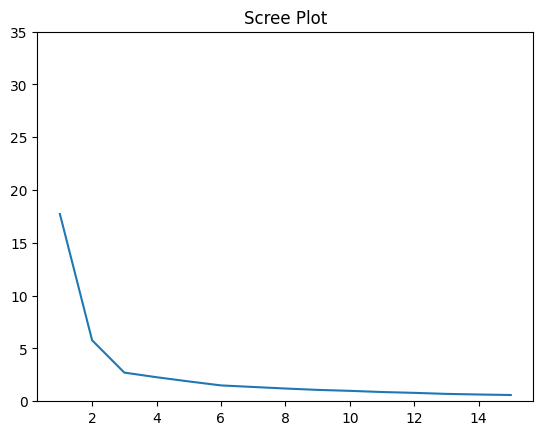

In [34]:
#3.4 Print scree plot - elbow at 3
scree( data = df0_5 )

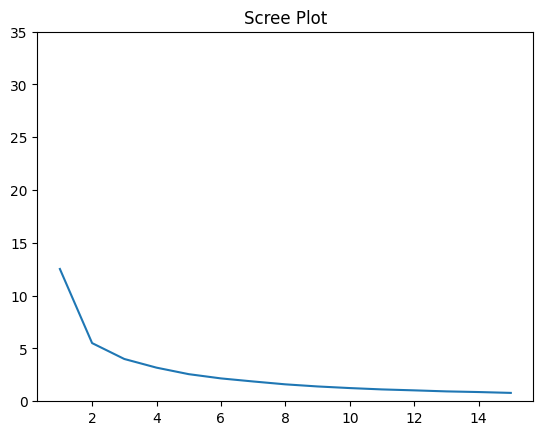

In [35]:
#3.5 Print scree plot - elbow at 2?
scree( df1_0 )

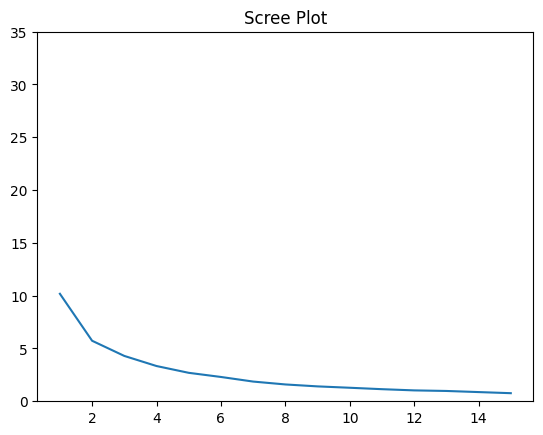

In [36]:
#3.6 Print scree plot - no obvious elbow
scree( df2_0 )

4. When the groups are well-separated and clearly defined, adding an extra cluster produces a substantial reduction in Sum of Squared Errors (SSE), signifying a significant improvement. However, as noise or variability in the data increases, the groups begin to spread out, and their boundaries become less distinguishable. Although we may have some intuition that data points in certain regions belong to specific clusters, the overlap among groups blurs the distinctions. This causes it to become challenging to determine the optimal number of clusters or the assignment of data points to clusters. In such cases, clustering may lack stability, and it may not reveal underlying diversity in the data. Therefore, if the clusters are distinct and separable, the scree plot method is effective, and a clear elbow point is evident. However, when the data points form a cloud with overlapping characteristics, the scree plot appears smooth, and the elbow point is not easily discernible.


**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?